In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from itertools import chain

In [2]:
def read_data(filename):
    with open(filename) as f:
        return json.loads(f.read())

In [3]:
with open("./analysis/analysis.py") as f:
    exec(f.read())

In [66]:
vidsim = VideoSimulation("./Animation TIF Files/TwoSpecies0.5and0.8/")
vidsim = VideoSimulation("./Animation TIF Files/TwoSpecies0.5and1.5/")
# vidsim = VideoSimulation("./Animation TIF Files/TwoSpecies1.5and2.5/")
# vidsim = VideoSimulation("/Users/yotamvaknin/Downloads/")

In [80]:
for i,j in vidsim.parameters.items():
    print(i, str(j)[:100])

screen_size_in_pixels_y 400
pixel_length_in_um 0.117
molecules [{'intensity': 100, 'number_of_molecules': 5000, 'molecules': [{'intensity': 100, 'start_frame': 841
screen_size_in_pixels_x 400
z_direction_depth_in_um 1.2
total_time_in_seconds 10.0
psf_sigma_in_um_x_axis 0.04
number_of_subframes_per_frame 100
background_noise_amplitude 30
psf_sigma_in_um_y_axis 0.04
exposure_time_in_ms 40.0


In [74]:
max_step_size = 5
min_number_of_steps = 4
video_tracks = vidsim.get_video_tracks(max_step_size)
sim_tracks = vidsim.get_simulation_tracks(max_number_of_pixels= max_step_size, 
                                          min_number_of_steps=min_number_of_steps,
                                    blur_motion=True)
sim_tracks_no_blur = vidsim.get_simulation_tracks(max_number_of_pixels= max_step_size, 
                                          min_number_of_steps=min_number_of_steps,
                                    blur_motion=False)

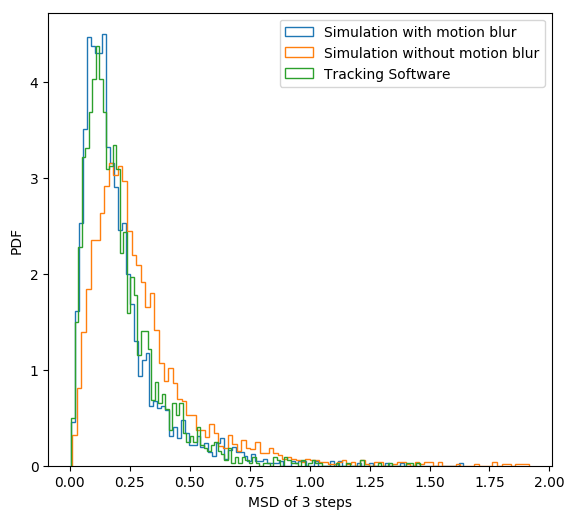

In [77]:
sim_y, (*sim_x, _),  _ = sim_tracks.plot_n_steps_square_displacements(3,100, histtype = 'step', density=True)
sim_no_blur_y, (*sim_no_blur_x, _),  _ = sim_tracks_no_blur.plot_n_steps_square_displacements(3,100, histtype = 'step', density=True)
vid_y, (*vid_x, _), _ = video_tracks.plot_n_steps_square_displacements(3,100, histtype = 'step', density=True)
plt.xlabel("MSD of 3 steps")
plt.ylabel("PDF")
plt.legend(["Simulation with motion blur","Simulation without motion blur","Tracking Software"])

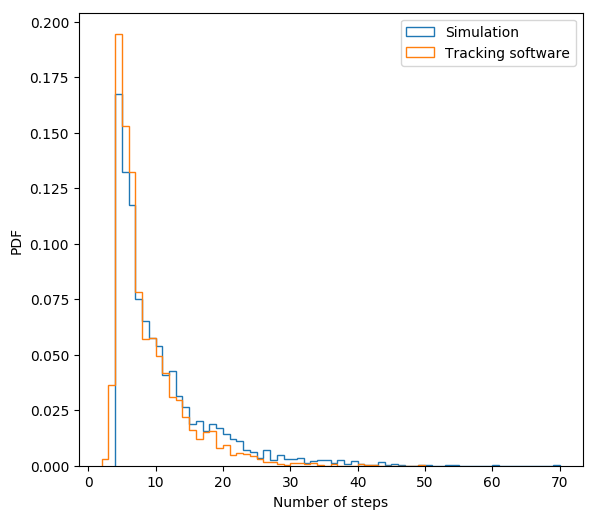

In [69]:
y2, (*x2,_), _ = sim_tracks.plot_number_of_steps(histtype = 'step', density = True)
y1, (*x1,_), _ = video_tracks.plot_number_of_steps(histtype= 'step', density= True)

plt.xlabel("Number of steps")
plt.ylabel("PDF")
plt.legend(["Simulation","Tracking software"])

[0.4324719  0.85758521 2.05598849]


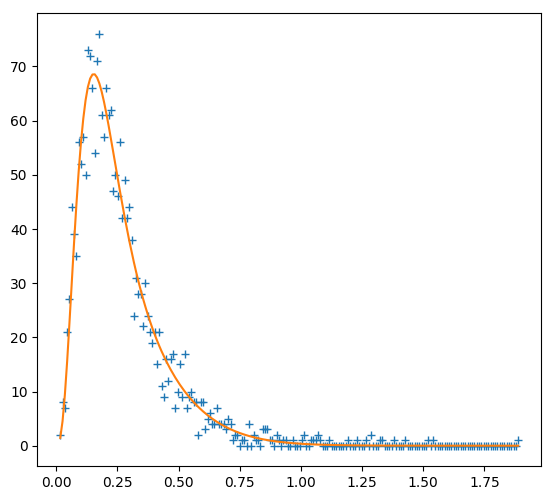

In [70]:
args, [X, Y, dist] = video_tracks.approxiamte_diffusion_coefficients(number_of_steps=4, p0 = [.7,1.5,1])
print(args *3/2)
plt.plot(X , Y, '+')
plt.plot(X , dist)

In [71]:
n = 3
delta_t = video_tracks.step_time_in_seconds
msds =  video_tracks.square_displacements_of_n_steps(n)
# msds =  sim_tracks.square_displacements_of_n_steps(n)
def log_likelihood(msd, D1, D2, A):
    return np.sum(np.log((single_species_dist(msd, n, D1,delta_t) +
                                A*single_species_dist(msd, n, D2,delta_t))/(A+1)))

def single_species_dist(msd, n, D, delta_t):
    return (1/(2*D*delta_t))**n * (1/(np.math.factorial(n-1)*2**n)) * msd**(n-1) * \
                  np.exp(-msd/(2*(2*D*delta_t)))
    
def lf(args):
    D1, D2, A = args
    return -log_likelihood(msds,D1, D2, A)

print(optimize.minimize(lf, x0 = [.25,.6,1], tol = 1e-13).x*3/2)

[0.49136053 1.18765338 0.47374288]


In [56]:
lf([.3,.8,1])

609.80331799273